# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

21:48:48 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=925109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=628570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=366585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=510636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=124903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=965228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

21:48:50 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=663060;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=260484;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=984874;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=435871;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

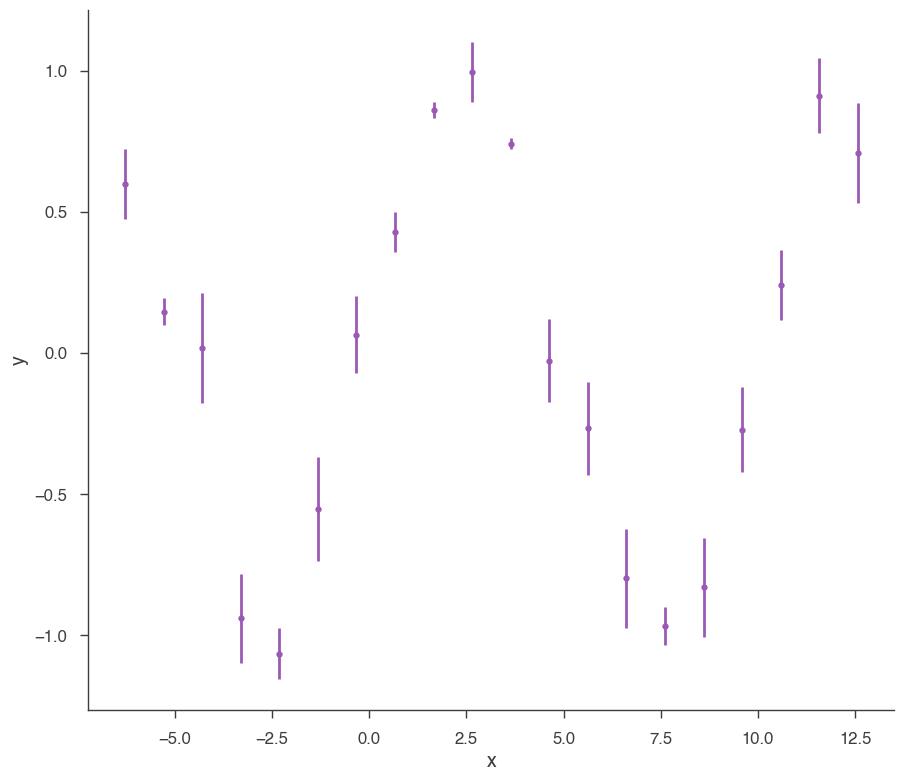

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

21:48:51 INFO      sampler set to emcee                                                    ]8;id=455639;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=690357;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

21:48:53 INFO      Mean acceptance fraction: 0.7161                                            ]8;id=97809;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=262536;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

21:48:54 INFO      fit restored to maximum of posterior                                         ]8;id=24231;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=732227;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=26857;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=306354;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.872673
total,-9.872673


Values of statistical measures:

,statistical measures
AIC,24.451229
BIC,25.736811
DIC,23.618834
PDIC,1.935311


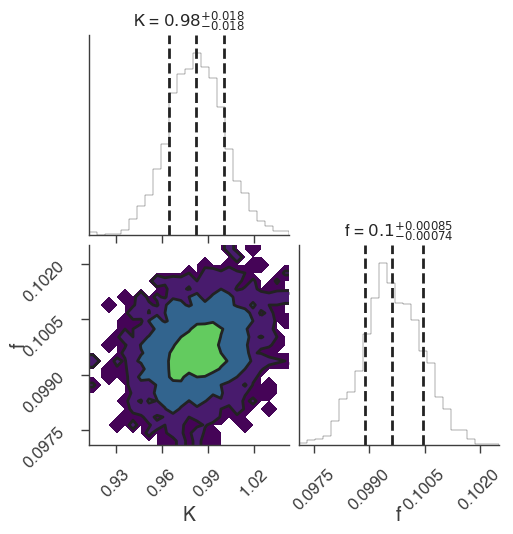

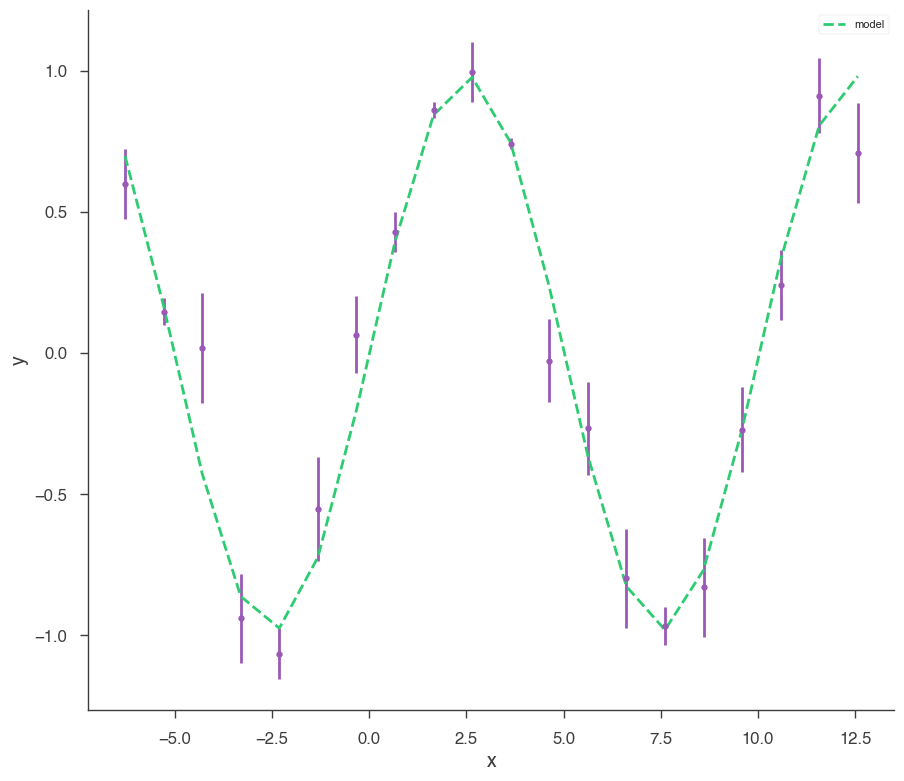

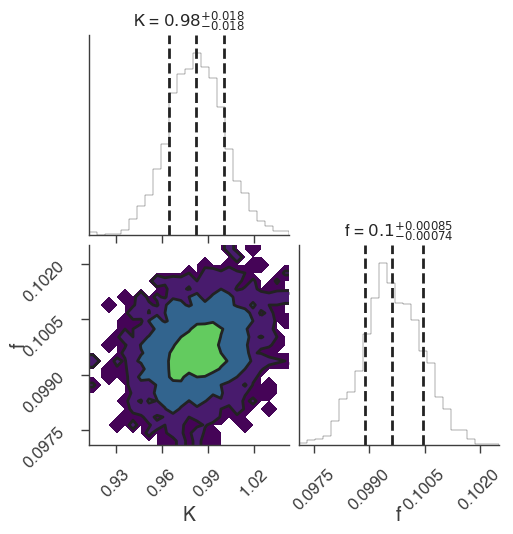

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

21:48:55 INFO      sampler set to multinest                                                ]8;id=18756;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=281512;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -18.497004821217867      +/-  0.13768875392526056     
 Total Likelihood Evaluations:         5776
 Sampling finished. Exiting MultiNest



21:48:56 INFO      fit restored to maximum of posterior                                         ]8;id=349855;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=182519;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=937953;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=835022;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.20 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 -0.07 +0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.872788
total,-9.872788


Values of statistical measures:

,statistical measures
AIC,24.451459
BIC,25.737041
DIC,23.966605
PDIC,2.109977
log(Z),-8.033147


         INFO      deleting the chain directory chains                                     ]8;id=594400;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=30918;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

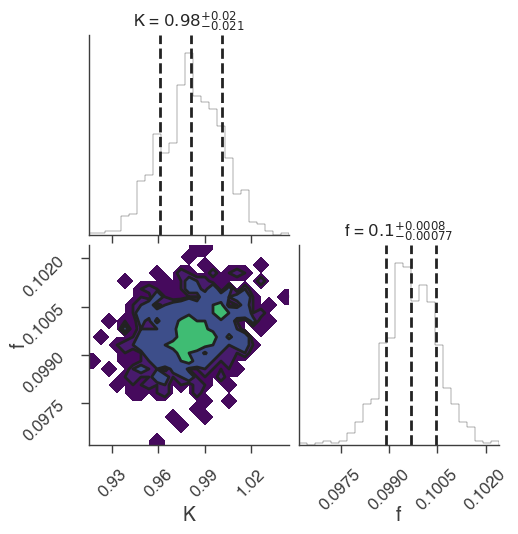

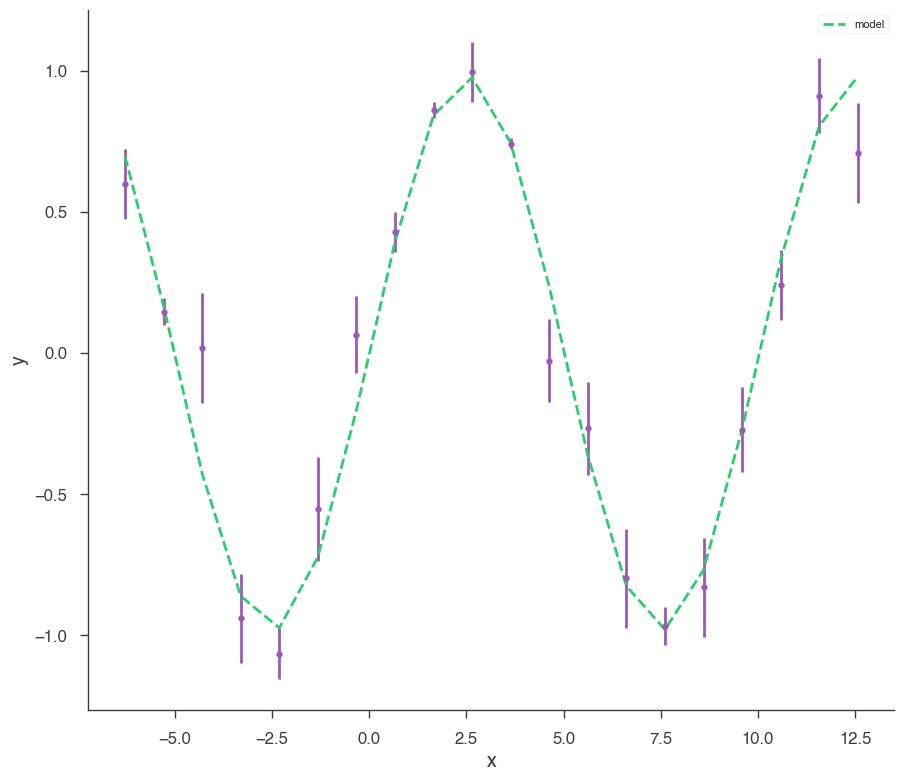

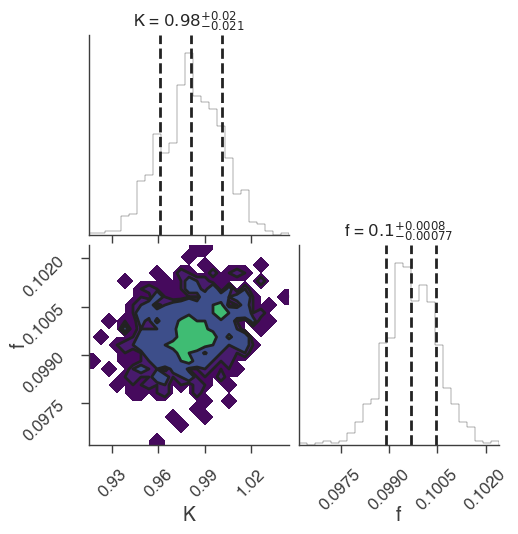

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=680149;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=456875;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

250it [00:00, 2490.71it/s, bound: 0 | nc: 2 | ncall: 761 | eff(%): 32.852 | loglstar:   -inf < -2104.584 <    inf | logz: -2111.003 +/-  0.125 | dlogz: 2095.068 >  0.409]

500it [00:00, 2032.95it/s, bound: 0 | nc: 3 | ncall: 1375 | eff(%): 36.364 | loglstar:   -inf < -1299.776 <    inf | logz: -1307.000 +/-  0.128 | dlogz: 1295.000 >  0.409]

709it [00:00, 1570.30it/s, bound: 0 | nc: 7 | ncall: 2246 | eff(%): 31.567 | loglstar:   -inf < -1046.625 <    inf | logz: -1054.285 +/-  0.133 | dlogz: 1041.636 >  0.409]

877it [00:00, 1278.63it/s, bound: 0 | nc: 2 | ncall: 3327 | eff(%): 26.360 | loglstar:   -inf < -692.482 <    inf | logz: -701.158 +/-  0.141 | dlogz: 689.163 >  0.409]   

1015it [00:00, 1066.01it/s, bound: 0 | nc: 23 | ncall: 4686 | eff(%): 21.660 | loglstar:   -inf < -447.064 <    inf | logz: -455.885 +/-  0.141 | dlogz: 444.060 >  0.409]

1130it [00:01, 847.29it/s, bound: 0 | nc: 25 | ncall: 6333 | eff(%): 17.843 | loglstar:   -inf < -321.184 <    inf | logz: -329.023 +/-  0.132 | dlogz: 315.847 >  0.409] 

1224it [00:01, 685.81it/s, bound: 0 | nc: 3 | ncall: 8078 | eff(%): 15.152 | loglstar:   -inf < -251.075 <    inf | logz: -259.554 +/-  0.135 | dlogz: 246.630 >  0.409] 

1301it [00:01, 596.68it/s, bound: 0 | nc: 22 | ncall: 9823 | eff(%): 13.244 | loglstar:   -inf < -209.151 <    inf | logz: -217.595 +/-  0.136 | dlogz: 204.487 >  0.409]

1366it [00:01, 455.17it/s, bound: 0 | nc: 41 | ncall: 12211 | eff(%): 11.187 | loglstar:   -inf < -186.392 <    inf | logz: -194.843 +/-  0.140 | dlogz: 181.545 >  0.409]

1418it [00:02, 331.72it/s, bound: 1 | nc: 2 | ncall: 14180 | eff(%): 10.000 | loglstar:   -inf < -167.072 <    inf | logz: -175.265 +/-  0.137 | dlogz: 161.710 >  0.409] 

1639it [00:02, 603.77it/s, bound: 1 | nc: 3 | ncall: 14513 | eff(%): 11.293 | loglstar:   -inf < -106.136 <    inf | logz: -114.554 +/-  0.137 | dlogz: 100.667 >  0.409]

1756it [00:02, 624.60it/s, bound: 2 | nc: 1 | ncall: 14776 | eff(%): 11.884 | loglstar:   -inf < -82.583 <    inf | logz: -91.154 +/-  0.139 | dlogz: 77.005 >  0.409]   

1989it [00:02, 929.60it/s, bound: 2 | nc: 2 | ncall: 15116 | eff(%): 13.158 | loglstar:   -inf < -50.515 <    inf | logz: -59.290 +/-  0.138 | dlogz: 44.497 >  0.409]

2121it [00:02, 894.82it/s, bound: 3 | nc: 1 | ncall: 15388 | eff(%): 13.783 | loglstar:   -inf < -38.144 <    inf | logz: -47.172 +/-  0.142 | dlogz: 32.030 >  0.409]

2345it [00:02, 1170.12it/s, bound: 3 | nc: 1 | ncall: 15727 | eff(%): 14.911 | loglstar:   -inf < -26.117 <    inf | logz: -34.773 +/-  0.139 | dlogz: 19.018 >  0.409]

2494it [00:02, 1032.62it/s, bound: 4 | nc: 1 | ncall: 16013 | eff(%): 15.575 | loglstar:   -inf < -21.486 <    inf | logz: -30.103 +/-  0.137 | dlogz: 13.962 >  0.409]

2716it [00:02, 1283.83it/s, bound: 4 | nc: 2 | ncall: 16359 | eff(%): 16.602 | loglstar:   -inf < -16.534 <    inf | logz: -25.206 +/-  0.138 | dlogz:  8.500 >  0.409]

2872it [00:03, 1083.99it/s, bound: 5 | nc: 1 | ncall: 16639 | eff(%): 17.261 | loglstar:   -inf < -14.422 <    inf | logz: -23.137 +/-  0.138 | dlogz:  6.081 >  0.409]

3075it [00:03, 1282.27it/s, bound: 5 | nc: 17 | ncall: 16987 | eff(%): 18.102 | loglstar:   -inf < -12.460 <    inf | logz: -21.201 +/-  0.139 | dlogz:  3.657 >  0.409]

3228it [00:03, 1117.92it/s, bound: 6 | nc: 1 | ncall: 17265 | eff(%): 18.697 | loglstar:   -inf < -11.640 <    inf | logz: -20.335 +/-  0.139 | dlogz:  2.473 >  0.409] 

3438it [00:03, 1329.36it/s, bound: 6 | nc: 1 | ncall: 17625 | eff(%): 19.506 | loglstar:   -inf < -10.982 <    inf | logz: -19.598 +/-  0.138 | dlogz:  1.404 >  0.409]

3594it [00:03, 1162.94it/s, bound: 7 | nc: 1 | ncall: 17895 | eff(%): 20.084 | loglstar:   -inf < -10.667 <    inf | logz: -19.267 +/-  0.138 | dlogz:  0.916 >  0.409]

3798it [00:03, 1351.63it/s, bound: 7 | nc: 4 | ncall: 18244 | eff(%): 20.818 | loglstar:   -inf < -10.356 <    inf | logz: -18.989 +/-  0.138 | dlogz:  0.520 >  0.409]

3885it [00:04, 959.92it/s, +400 | bound: 8 | nc: 1 | ncall: 18810 | eff(%): 23.275 | loglstar:   -inf < -9.891 <    inf | logz: -18.559 +/-  0.138 | dlogz:  0.001 >  0.409]

21:49:01 INFO      fit restored to maximum of posterior                                         ]8;id=481422;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=851303;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=453226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=64022;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.20 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.873327
total,-9.873327


Values of statistical measures:

,statistical measures
AIC,24.452536
BIC,25.738118
DIC,23.830204
PDIC,2.042156
log(Z),-8.060069


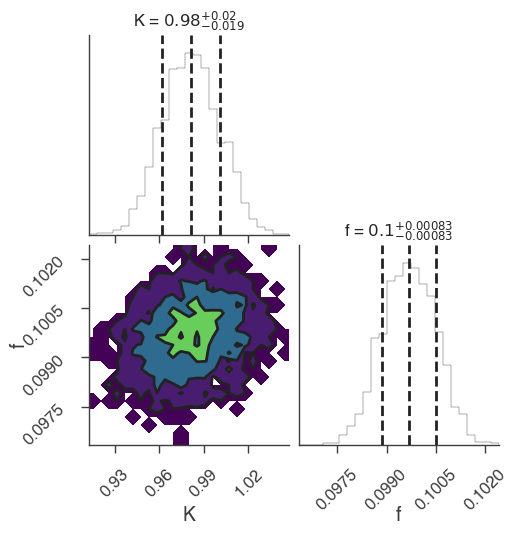

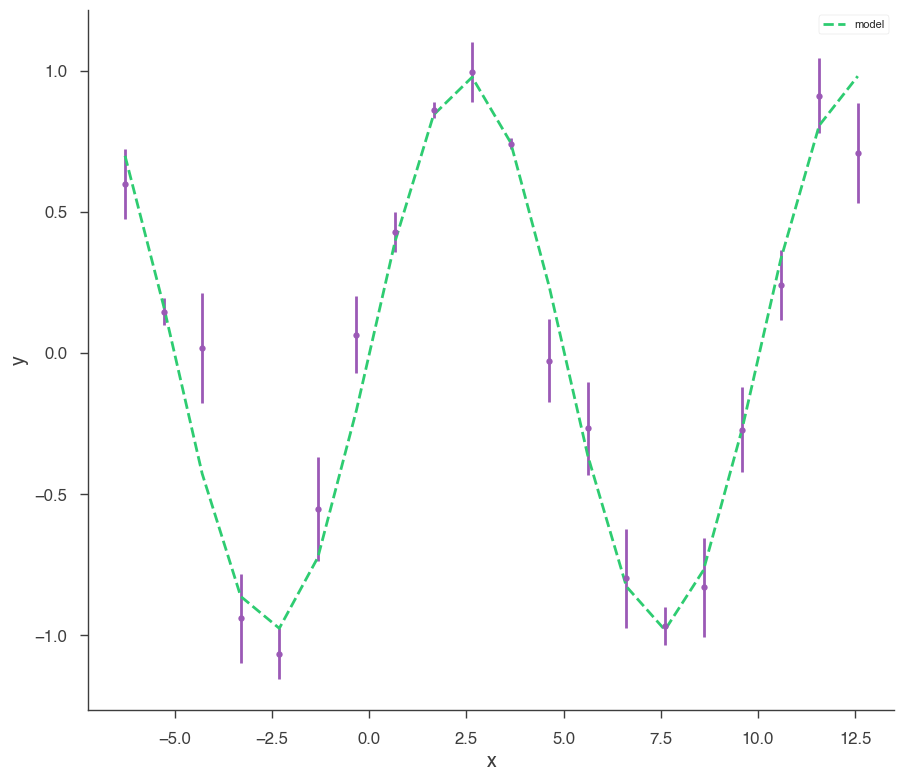

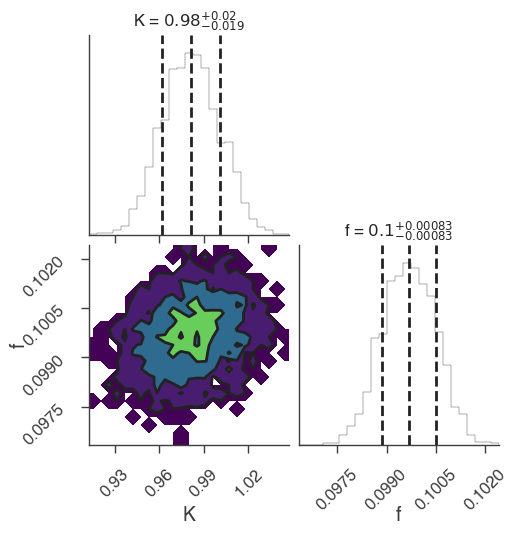

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=302661;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=250455;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

128it [00:00, 1279.93it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 150 | eff(%): 19.692 | loglstar:   -inf < -3518.029 <    inf | logz: -3524.403 +/-  0.107 | dlogz: 3509.591 >  0.010]

345it [00:00, 1799.82it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 498 | eff(%): 34.569 | loglstar:   -inf < -2041.639 <    inf | logz: -2049.235 +/-  0.123 | dlogz: 2040.172 >  0.010]

525it [00:00, 1769.48it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 925 | eff(%): 36.842 | loglstar:   -inf < -1431.542 <    inf | logz: -1439.056 +/-  0.118 | dlogz: 1424.209 >  0.010]

702it [00:00, 1631.05it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1501 | eff(%): 35.082 | loglstar:   -inf < -1217.498 <    inf | logz: -1224.581 +/-  0.112 | dlogz: 1208.261 >  0.010]

867it [00:00, 1417.12it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 2290 | eff(%): 31.075 | loglstar:   -inf < -1084.056 <    inf | logz: -1091.768 +/-  0.122 | dlogz: 1078.714 >  0.010]

1013it [00:00, 1173.80it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 3253 | eff(%): 26.992 | loglstar:   -inf < -847.719 <    inf | logz: -856.651 +/-  0.134 | dlogz: 851.063 >  0.010]  

1138it [00:00, 1114.82it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 4269 | eff(%): 23.862 | loglstar:   -inf < -662.428 <    inf | logz: -671.305 +/-  0.128 | dlogz: 658.434 >  0.010]

1255it [00:01, 955.66it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 5485 | eff(%): 20.969 | loglstar:   -inf < -502.899 <    inf | logz: -511.729 +/-  0.128 | dlogz: 498.067 >  0.010] 

1356it [00:01, 895.60it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 6460 | eff(%): 19.483 | loglstar:   -inf < -408.097 <    inf | logz: -416.312 +/-  0.125 | dlogz: 402.322 >  0.010]

1449it [00:01, 737.46it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 7815 | eff(%): 17.426 | loglstar:   -inf < -339.592 <    inf | logz: -347.982 +/-  0.124 | dlogz: 333.864 >  0.010]

1528it [00:01, 656.79it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 8784 | eff(%): 16.458 | loglstar:   -inf < -301.989 <    inf | logz: -310.575 +/-  0.123 | dlogz: 296.808 >  0.010]

1598it [00:01, 604.38it/s, batch: 0 | bound: 0 | nc: 71 | ncall: 10234 | eff(%): 14.887 | loglstar:   -inf < -270.191 <    inf | logz: -278.273 +/-  0.120 | dlogz: 264.159 >  0.010]

1661it [00:02, 403.25it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 11996 | eff(%): 13.292 | loglstar:   -inf < -241.075 <    inf | logz: -249.780 +/-  0.126 | dlogz: 235.740 >  0.010]

1711it [00:02, 391.37it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 13065 | eff(%): 12.613 | loglstar:   -inf < -218.828 <    inf | logz: -227.407 +/-  0.126 | dlogz: 213.503 >  0.010]

1757it [00:02, 340.72it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 14541 | eff(%): 11.681 | loglstar:   -inf < -199.109 <    inf | logz: -207.433 +/-  0.122 | dlogz: 193.302 >  0.010]

1796it [00:02, 299.85it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 15770 | eff(%): 11.039 | loglstar:   -inf < -185.904 <    inf | logz: -194.106 +/-  0.122 | dlogz: 179.840 >  0.010]

1829it [00:02, 283.21it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 16823 | eff(%): 10.558 | loglstar:   -inf < -174.899 <    inf | logz: -184.159 +/-  0.129 | dlogz: 170.258 >  0.010]

1860it [00:02, 270.73it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 17849 | eff(%): 10.137 | loglstar:   -inf < -167.728 <    inf | logz: -176.079 +/-  0.121 | dlogz: 162.615 >  0.010] 

1888it [00:03, 228.87it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18228 | eff(%): 10.081 | loglstar:   -inf < -161.114 <    inf | logz: -169.693 +/-  0.124 | dlogz: 156.244 >  0.010]

2105it [00:03, 614.51it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18549 | eff(%): 11.050 | loglstar:   -inf < -107.769 <    inf | logz: -116.614 +/-  0.126 | dlogz: 102.684 >  0.010]

2281it [00:03, 867.32it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18920 | eff(%): 11.746 | loglstar:   -inf < -81.648 <    inf | logz: -90.259 +/-  0.125 | dlogz: 75.869 >  0.010]   

2391it [00:03, 765.25it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19069 | eff(%): 12.218 | loglstar:   -inf < -66.776 <    inf | logz: -75.379 +/-  0.125 | dlogz: 60.785 >  0.010]

2603it [00:03, 1064.70it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19387 | eff(%): 13.089 | loglstar:   -inf < -49.056 <    inf | logz: -57.736 +/-  0.125 | dlogz: 42.690 >  0.010]

2767it [00:03, 910.38it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19714 | eff(%): 13.689 | loglstar:   -inf < -38.455 <    inf | logz: -47.206 +/-  0.125 | dlogz: 31.815 >  0.010] 

2992it [00:03, 1185.33it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20025 | eff(%): 14.577 | loglstar:   -inf < -28.383 <    inf | logz: -37.254 +/-  0.125 | dlogz: 21.402 >  0.010]

3174it [00:03, 1329.37it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20381 | eff(%): 15.200 | loglstar:   -inf < -22.699 <    inf | logz: -31.429 +/-  0.126 | dlogz: 15.198 >  0.010]

3331it [00:04, 1094.16it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20605 | eff(%): 15.783 | loglstar:   -inf < -19.017 <    inf | logz: -28.083 +/-  0.126 | dlogz: 11.538 >  0.010]

3531it [00:04, 1289.16it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 20937 | eff(%): 16.472 | loglstar:   -inf < -16.032 <    inf | logz: -24.850 +/-  0.126 | dlogz:  7.897 >  0.010]

3684it [00:04, 1058.30it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21249 | eff(%): 16.939 | loglstar:   -inf < -14.502 <    inf | logz: -23.357 +/-  0.125 | dlogz:  6.097 >  0.010]

3909it [00:04, 1307.60it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 21545 | eff(%): 17.732 | loglstar:   -inf < -12.912 <    inf | logz: -21.761 +/-  0.125 | dlogz:  4.077 >  0.010]

4095it [00:04, 1434.59it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21905 | eff(%): 18.277 | loglstar:   -inf < -11.982 <    inf | logz: -20.868 +/-  0.125 | dlogz:  2.860 >  0.010]

4261it [00:04, 1205.39it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22140 | eff(%): 18.821 | loglstar:   -inf < -11.435 <    inf | logz: -20.309 +/-  0.125 | dlogz:  2.047 >  0.010]

4454it [00:04, 1365.70it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22490 | eff(%): 19.374 | loglstar:   -inf < -10.908 <    inf | logz: -19.834 +/-  0.125 | dlogz:  1.348 >  0.010]

4611it [00:05, 1146.53it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22774 | eff(%): 19.812 | loglstar:   -inf < -10.614 <    inf | logz: -19.555 +/-  0.126 | dlogz:  0.946 >  0.010]

4819it [00:05, 1349.69it/s, batch: 0 | bound: 7 | nc: 6 | ncall: 23083 | eff(%): 20.434 | loglstar:   -inf < -10.382 <    inf | logz: -19.301 +/-  0.126 | dlogz:  0.591 >  0.010]

5007it [00:05, 1472.45it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 23431 | eff(%): 20.923 | loglstar:   -inf < -10.227 <    inf | logz: -19.147 +/-  0.126 | dlogz:  0.388 >  0.010]

5172it [00:05, 1167.45it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23662 | eff(%): 21.406 | loglstar:   -inf < -10.130 <    inf | logz: -19.052 +/-  0.126 | dlogz:  0.270 >  0.010]

5311it [00:05, 1062.43it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23888 | eff(%): 21.777 | loglstar:   -inf < -10.068 <    inf | logz: -18.993 +/-  0.126 | dlogz:  0.200 >  0.010]

5454it [00:05, 927.16it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24218 | eff(%): 22.065 | loglstar:   -inf < -10.029 <    inf | logz: -18.947 +/-  0.126 | dlogz:  0.147 >  0.010] 

5675it [00:06, 1181.08it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24524 | eff(%): 22.678 | loglstar:   -inf < -9.980 <    inf | logz: -18.897 +/-  0.126 | dlogz:  0.093 >  0.010]

5842it [00:06, 1288.16it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 24872 | eff(%): 23.025 | loglstar:   -inf < -9.952 <    inf | logz: -18.872 +/-  0.126 | dlogz:  0.066 >  0.010]

5991it [00:06, 1103.01it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25103 | eff(%): 23.400 | loglstar:   -inf < -9.938 <    inf | logz: -18.856 +/-  0.126 | dlogz:  0.048 >  0.010]

6183it [00:06, 1282.55it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25398 | eff(%): 23.874 | loglstar:   -inf < -9.923 <    inf | logz: -18.841 +/-  0.126 | dlogz:  0.033 >  0.010]

6330it [00:06, 1057.06it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25724 | eff(%): 24.138 | loglstar:   -inf < -9.915 <    inf | logz: -18.833 +/-  0.126 | dlogz:  0.024 >  0.010]

6596it [00:06, 1399.25it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26102 | eff(%): 24.795 | loglstar:   -inf < -9.906 <    inf | logz: -18.823 +/-  0.126 | dlogz:  0.014 >  0.010]

6763it [00:06, 1438.57it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 26475 | eff(%): 25.071 | loglstar:   -inf < -9.902 <    inf | logz: -18.819 +/-  0.126 | dlogz:  0.010 >  0.010]

6927it [00:07, 1268.20it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26640 | eff(%): 25.671 | loglstar:   -inf < -9.899 <    inf | logz: -18.815 +/-  0.126 | dlogz:  0.007 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7271it [00:07, 744.27it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26984 | eff(%): 26.946 | loglstar: -11.687 < -9.988 < -10.380 | logz: -18.809 +/-  0.129 | stop:  1.549]          

7468it [00:07, 893.34it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27255 | eff(%): 26.874 | loglstar: -11.687 < -11.110 < -10.380 | logz: -18.809 +/-  0.129 | stop:  1.549]

7654it [00:07, 1036.44it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 27604 | eff(%): 27.202 | loglstar: -11.687 < -10.710 < -10.380 | logz: -18.809 +/-  0.129 | stop:  1.549]

7808it [00:08, 945.44it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27848 | eff(%): 27.510 | loglstar: -11.687 < -10.515 < -10.380 | logz: -18.809 +/-  0.129 | stop:  1.549] 

8231it [00:08, 1515.41it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28329 | eff(%): 28.844 | loglstar: -11.687 < -10.078 < -10.380 | logz: -18.809 +/-  0.129 | stop:  1.549]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8449it [00:09, 687.08it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28566 | eff(%): 29.046 | loglstar: -12.237 < -12.111 < -11.684 | logz: -18.816 +/-  0.107 | stop:  1.163] 

8880it [00:09, 1070.43it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29057 | eff(%): 30.357 | loglstar: -12.237 < -10.586 < -11.684 | logz: -18.816 +/-  0.107 | stop:  1.163]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9066it [00:09, 937.80it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29252 | eff(%): 30.993 | loglstar: -12.237 < -9.892 < -11.684 | logz: -18.816 +/-  0.107 | stop:  0.966]  

21:49:11 INFO      fit restored to maximum of posterior                                         ]8;id=226364;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=340513;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=909016;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=363335;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 +/- 0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.872376
total,-9.872376


Values of statistical measures:

,statistical measures
AIC,24.450634
BIC,25.736216
DIC,23.831902
PDIC,2.043244
log(Z),-8.172548


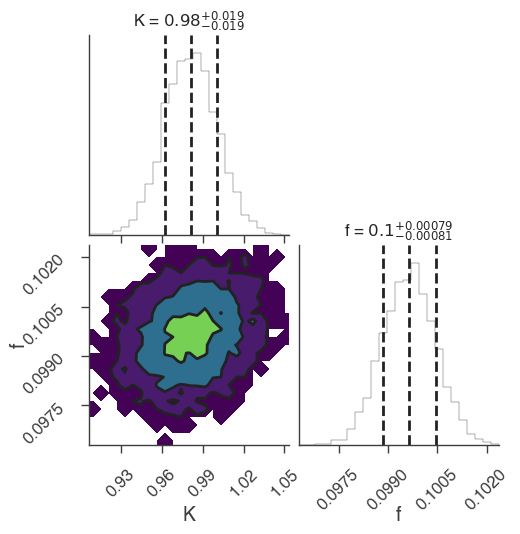

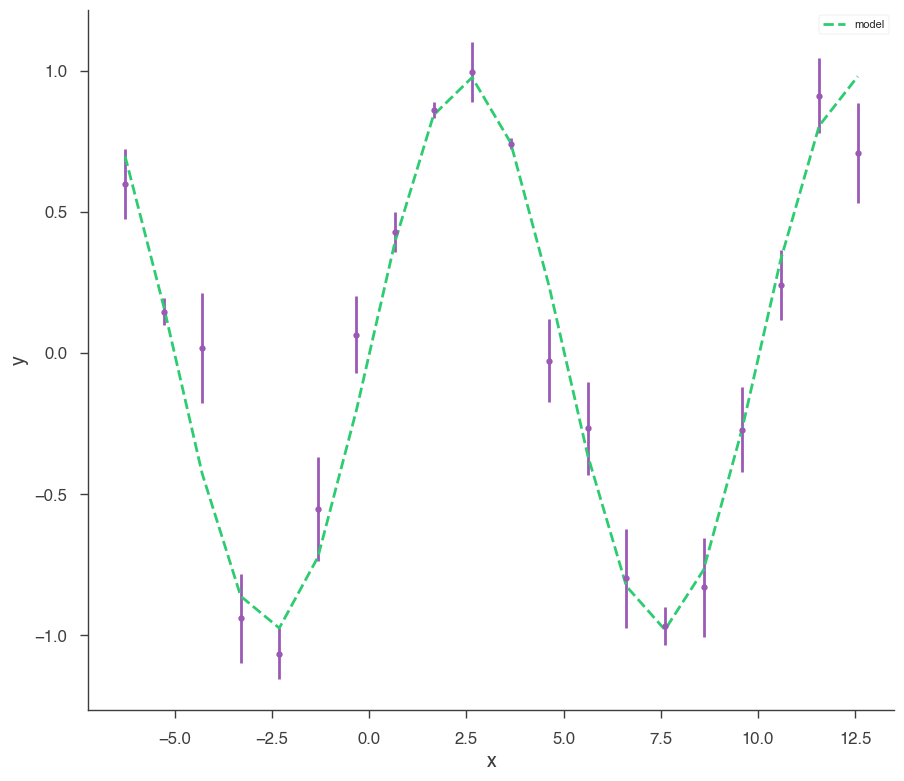

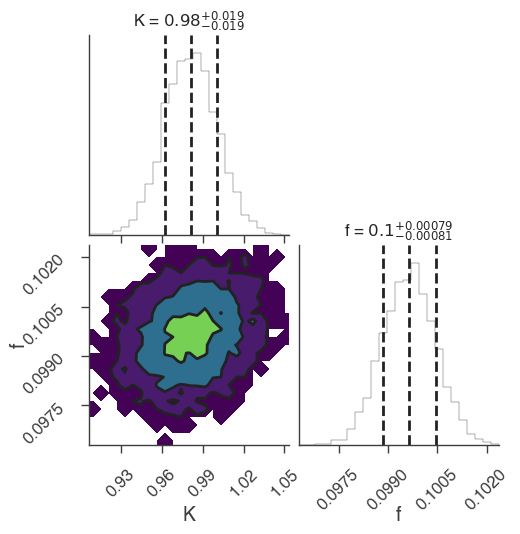

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

21:49:12 INFO      sampler set to zeus                                                     ]8;id=899813;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=273851;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 7/625 [00:00<00:09, 63.60it/s]

Sampling progress :   2%|▏         | 14/625 [00:00<00:09, 64.60it/s]

Sampling progress :   4%|▎         | 22/625 [00:00<00:08, 69.04it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:08, 68.17it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:08, 67.25it/s]

Sampling progress :   7%|▋         | 45/625 [00:00<00:08, 72.33it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:08, 69.63it/s]

Sampling progress :  10%|▉         | 62/625 [00:00<00:07, 73.09it/s]

Sampling progress :  11%|█         | 70/625 [00:00<00:07, 73.74it/s]

Sampling progress :  13%|█▎        | 79/625 [00:01<00:07, 75.69it/s]

Sampling progress :  14%|█▍        | 87/625 [00:01<00:07, 73.96it/s]

Sampling progress :  15%|█▌        | 95/625 [00:01<00:07, 74.30it/s]

Sampling progress :  16%|█▋        | 103/625 [00:01<00:07, 74.13it/s]

Sampling progress :  18%|█▊        | 111/625 [00:01<00:06, 74.00it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:06, 75.05it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:06, 75.15it/s]

Sampling progress :  22%|██▏       | 136/625 [00:01<00:06, 77.15it/s]

Sampling progress :  23%|██▎       | 145/625 [00:01<00:06, 78.52it/s]

Sampling progress :  24%|██▍       | 153/625 [00:02<00:06, 74.96it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:06, 75.33it/s]

Sampling progress :  27%|██▋       | 169/625 [00:02<00:06, 75.35it/s]

Sampling progress :  28%|██▊       | 177/625 [00:02<00:05, 76.54it/s]

Sampling progress :  30%|██▉       | 186/625 [00:02<00:05, 78.79it/s]

Sampling progress :  31%|███       | 194/625 [00:02<00:05, 78.19it/s]

Sampling progress :  32%|███▏      | 202/625 [00:02<00:05, 75.58it/s]

Sampling progress :  34%|███▎      | 210/625 [00:02<00:05, 72.86it/s]

Sampling progress :  35%|███▍      | 218/625 [00:02<00:05, 73.56it/s]

Sampling progress :  36%|███▌      | 226/625 [00:03<00:05, 74.44it/s]

Sampling progress :  37%|███▋      | 234/625 [00:03<00:05, 73.67it/s]

Sampling progress :  39%|███▊      | 242/625 [00:03<00:05, 74.76it/s]

Sampling progress :  40%|████      | 250/625 [00:03<00:04, 75.10it/s]

Sampling progress :  41%|████▏     | 259/625 [00:03<00:04, 77.78it/s]

Sampling progress :  43%|████▎     | 267/625 [00:03<00:04, 77.70it/s]

Sampling progress :  44%|████▍     | 275/625 [00:03<00:04, 74.01it/s]

Sampling progress :  45%|████▌     | 283/625 [00:03<00:04, 75.63it/s]

Sampling progress :  47%|████▋     | 291/625 [00:03<00:04, 75.31it/s]

Sampling progress :  48%|████▊     | 300/625 [00:04<00:04, 77.08it/s]

Sampling progress :  49%|████▉     | 308/625 [00:04<00:04, 76.51it/s]

Sampling progress :  51%|█████     | 316/625 [00:04<00:04, 75.18it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:04<00:04, 71.58it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:04<00:04, 72.70it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:04<00:03, 75.61it/s]

Sampling progress :  56%|█████▌    | 349/625 [00:04<00:03, 73.65it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:04<00:03, 74.35it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:04<00:03, 76.43it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:05<00:03, 75.06it/s]

Sampling progress :  61%|██████    | 382/625 [00:05<00:03, 72.88it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:05<00:03, 59.09it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:05<00:03, 63.53it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:05<00:03, 64.10it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:05<00:03, 66.34it/s]

Sampling progress :  67%|██████▋   | 420/625 [00:05<00:03, 67.25it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:05<00:02, 70.91it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:05<00:02, 69.39it/s]

Sampling progress :  71%|███████   | 445/625 [00:06<00:02, 68.08it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:06<00:02, 67.89it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:06<00:02, 69.93it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:06<00:02, 74.14it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:06<00:01, 75.59it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:06<00:01, 72.78it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:06<00:01, 72.12it/s]

Sampling progress :  80%|████████  | 502/625 [00:06<00:01, 71.79it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:06<00:01, 75.40it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:07<00:01, 77.82it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:07<00:01, 76.31it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:07<00:01, 76.29it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:07<00:01, 76.95it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:07<00:00, 78.10it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:07<00:00, 74.05it/s]

Sampling progress :  91%|█████████ | 569/625 [00:07<00:00, 74.31it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:07<00:00, 74.24it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:07<00:00, 72.20it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:08<00:00, 71.12it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:08<00:00, 70.75it/s]

Sampling progress :  97%|█████████▋| 609/625 [00:08<00:00, 70.25it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:08<00:00, 70.36it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 72.23it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 73.06it/s]

21:49:21 INFO      fit restored to maximum of posterior                                         ]8;id=569778;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=956625;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=309261;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=491280;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 19


Scale Factor: 1.309776


Mean Integrated Autocorrelation Time: 2.75


Effective Sample Size: 4549.99


Number of Log Probability Evaluations: 65282


Effective Samples per Log Probability Evaluation: 0.069697


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.18 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.872379
total,-9.872379


Values of statistical measures:

,statistical measures
AIC,24.450640
BIC,25.736222
DIC,23.650663
PDIC,1.952807


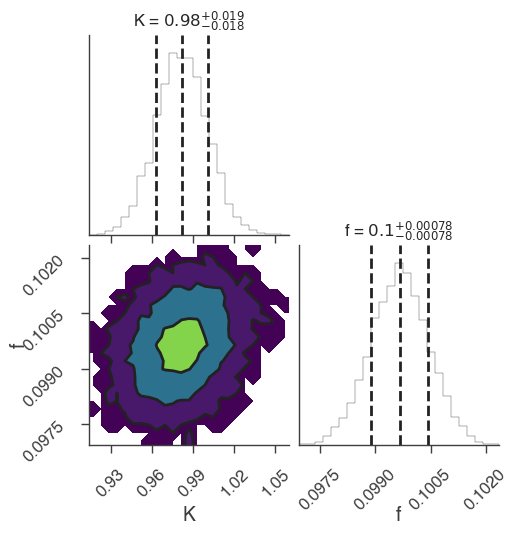

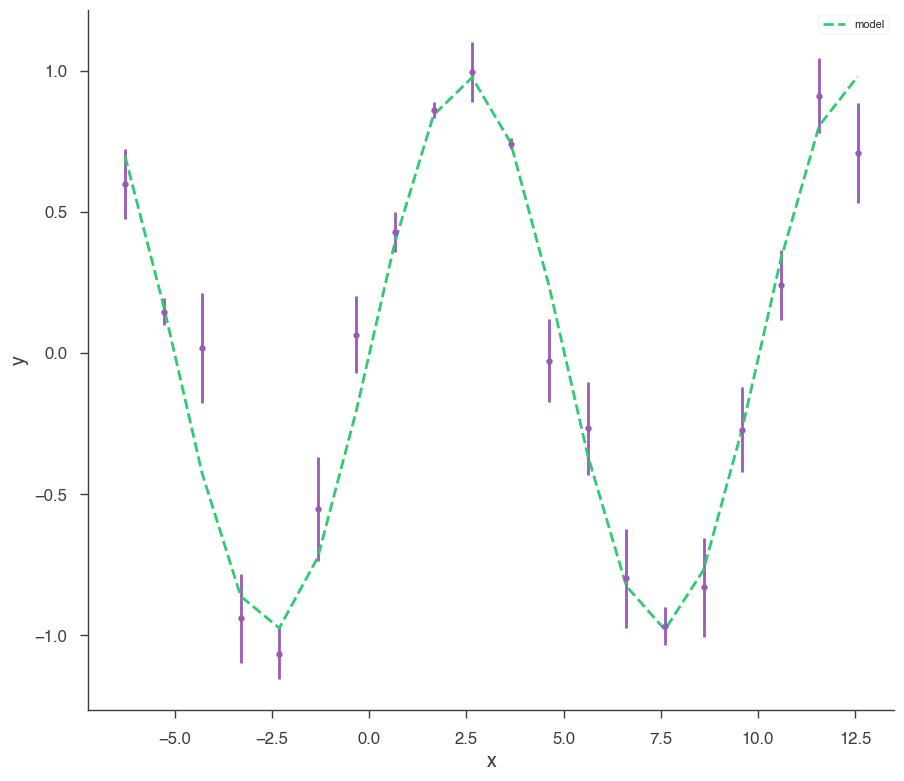

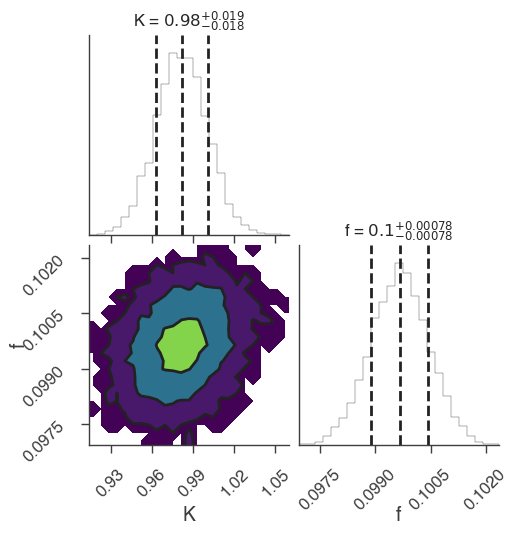

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

21:49:22 INFO      sampler set to ultranest                                                ]8;id=783561;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=304880;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 5864


[ultranest]   logZ = -18.6 +- 0.1357


[ultranest] Effective samples strategy satisfied (ESS = 976.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.14 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


21:49:28 INFO      fit restored to maximum of posterior                                         ]8;id=375557;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=350566;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=14760;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=506982;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.19 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.87251
total,-9.87251


Values of statistical measures:

,statistical measures
AIC,24.450903
BIC,25.736486
DIC,23.645755
PDIC,1.950376
log(Z),-8.076207


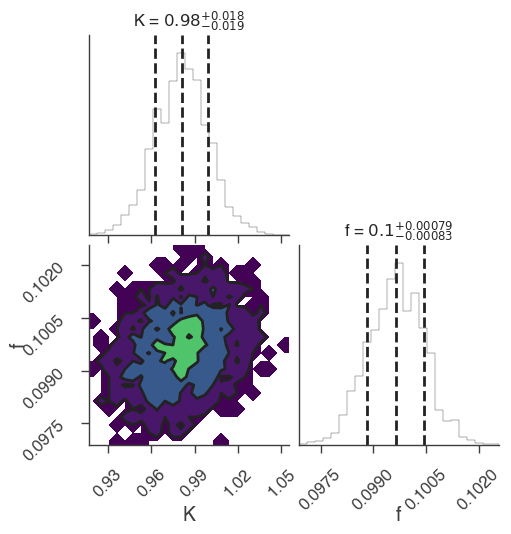

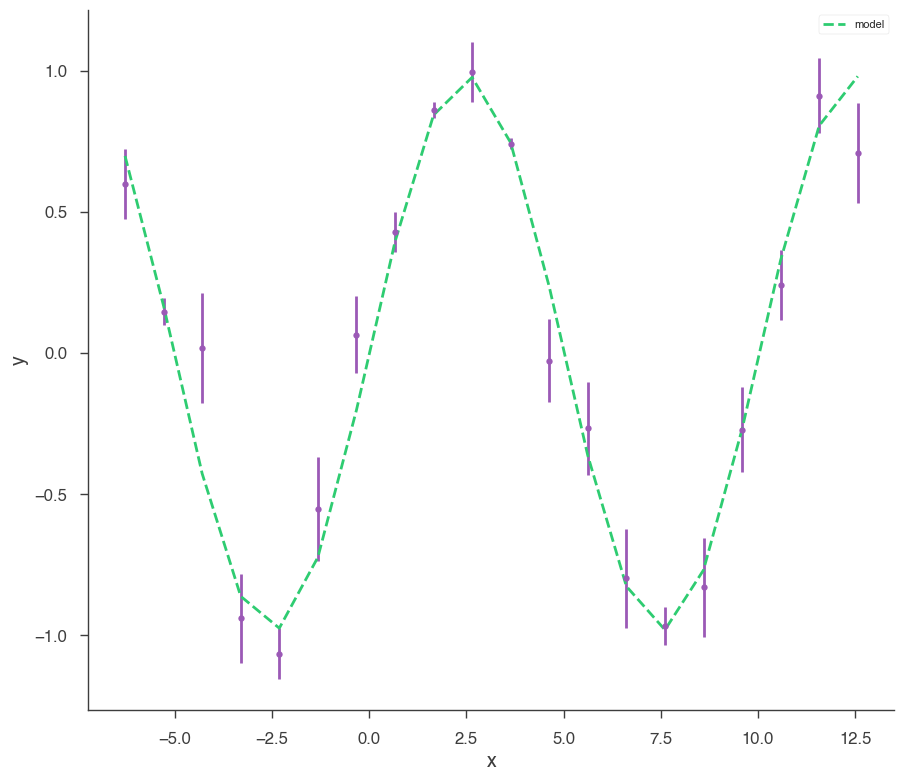

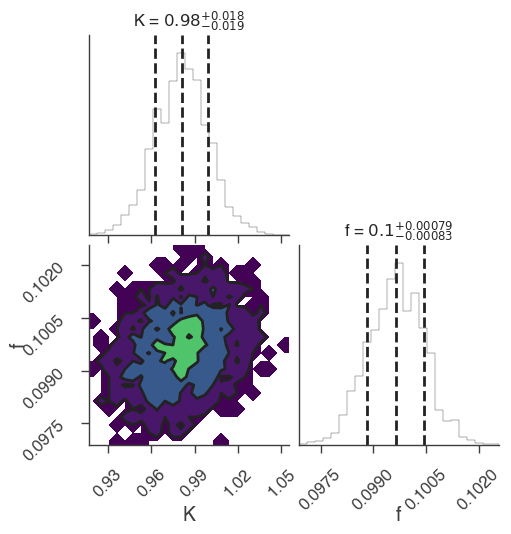

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()